In [3]:
import networkx as nx
from numpy.linalg import matrix_power
import numpy as np
import matplotlib.pyplot as plt

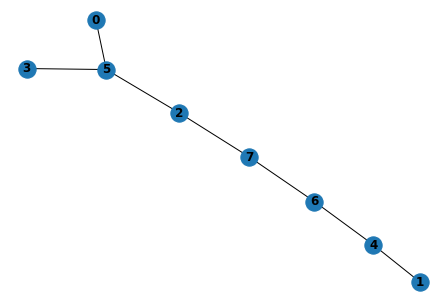

In [19]:
g = nx.random_tree(8)
nx.draw(g, with_labels=True, font_weight='bold')
A = nx.adjacency_matrix(g)
plt.show()

In [20]:
plt.savefig('output.png')

<Figure size 432x288 with 0 Axes>

In [16]:
#print(A.todense())
A = A.todense()
A = np.array(A)
A

array([[0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

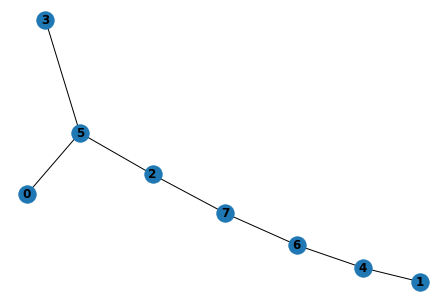

In [34]:
# convert adjacent matrix to networkx graph
g = nx.Graph(A)   # A is the adjacent matrix(numpy array)
nx.draw(g, with_labels=True, font_weight='bold') 

In [177]:
from numpy.linalg import matrix_power
import numpy as np

def matrix_B(A,k):    # compute B = A + A^2 + A^3 + ... + A^k
    #A = A.todense()
    n = A.shape[0]
    B = np.zeros(A.shape)   # B is a 2D array
    for i in range(k):
        B += matrix_power(A,k+1)
    for i in range(n):
        for j in range(n):
            if B[i][j] > 0:
                B[i][j] = 1
    return B

def max_row(B):    # return the row with max sum
    num = 0
    maxrow = 0
    for i in range(B.shape[0]):
        if np.sum(B[i]) > num:
            num = np.sum(B[i])
            maxrow = i
    return maxrow

In [178]:
B = matrix_B(A,3)
print(B)

[[1. 1. 1. 0. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1.]]


In [179]:
max_row(B) 

1

In [173]:
def leaves(A):    # list of node i be degree 1 
    n = A.shape[0]
    start = []
    for i in range(n):
        if np.sum(A[i]) == 1:
            start.append(i)
    return start    # int list

def pendant_path(A,i):   # return the length of the pendant graph start from leave node i 
    n = A.shape[0]
    length = 0        # record length
    leave = i         
    while True:
        if i == leave:
            for j in range(n):
                if A[i,j] == 1:    # if the checking node is the first node(leave)
                    i_last = i
                    i = j
                    length +=1    
                    break
        elif np.sum(A[i]) == 2 and A[i,i_last] == 1.0:
            for j in range(n):
                if A[i,j] == 1 and j != i_last:       # if the checking node is degree 2 node within
                    i_last = i
                    i = j
                    length +=1
                    break
        else:         # break if the pendant path end with the node with degree larger than 3
            break
    return length

def max_pendant_path(A,start):  # return the max length of pendant path in the graph given leave nodes list start
    num = 0
    for leave in start:
        length = pendant_path(A,leave)
        if length > num:
            num = length        
    return num
                
    

In [174]:
A = A.todense()
print(type(A))
start = leaves(A)
print(A)
max_pendant_path(A,start)

<class 'numpy.matrix'>
[[0 0 0 0 0 1 0 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 1 1 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]]


5

In [22]:
import matplotlib.pyplot as plt

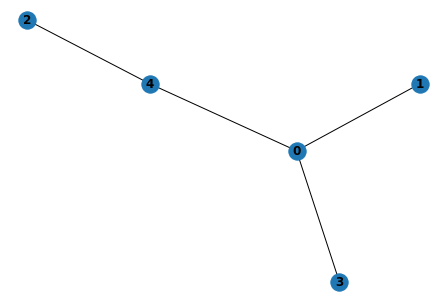

In [21]:
# example
G = nx.random_tree(5)
nx.draw(G, with_labels=True, font_weight='bold')  # plot original graph

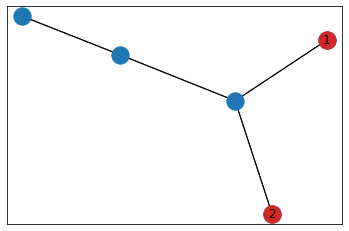

In [32]:
# task 
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos=pos,arrows=None, with_labels=False)    # plot original graph
nx.draw_networkx(G, pos=pos,nodelist = [1,3],arrows=None, node_color="tab:red",with_labels=False) # add red color
labels = {1:'1',3:'2'}          # label sources
description = nx.draw_networkx_labels(G,pos=pos,labels=labels)    # plot sources' number
plt.savefig('output.png')

In [117]:
# recursion permutation
def all_perms(elements):
    if len(elements) <=1:
        yield elements
    else:
        for perm in all_perms(elements[1:]):
            for i in range(len(elements)):
                yield perm[:i] + elements[0:1] + perm[i:]
                

                
                          
                

In [118]:
list(all_perms([1,2,3,4]))

[4] element1
[1, 2, 3, 4]
[2, 1, 3, 4]
[2, 3, 1, 4]
[2, 3, 4, 1]
[1, 3, 2, 4]
[3, 1, 2, 4]
[3, 2, 1, 4]
[3, 2, 4, 1]
[1, 3, 4, 2]
[3, 1, 4, 2]
[3, 4, 1, 2]
[3, 4, 2, 1]
[1, 2, 4, 3]
[2, 1, 4, 3]
[2, 4, 1, 3]
[2, 4, 3, 1]
[1, 4, 2, 3]
[4, 1, 2, 3]
[4, 2, 1, 3]
[4, 2, 3, 1]
[1, 4, 3, 2]
[4, 1, 3, 2]
[4, 3, 1, 2]
[4, 3, 2, 1]


[[1, 2, 3, 4],
 [2, 1, 3, 4],
 [2, 3, 1, 4],
 [2, 3, 4, 1],
 [1, 3, 2, 4],
 [3, 1, 2, 4],
 [3, 2, 1, 4],
 [3, 2, 4, 1],
 [1, 3, 4, 2],
 [3, 1, 4, 2],
 [3, 4, 1, 2],
 [3, 4, 2, 1],
 [1, 2, 4, 3],
 [2, 1, 4, 3],
 [2, 4, 1, 3],
 [2, 4, 3, 1],
 [1, 4, 2, 3],
 [4, 1, 2, 3],
 [4, 2, 1, 3],
 [4, 2, 3, 1],
 [1, 4, 3, 2],
 [4, 1, 3, 2],
 [4, 3, 1, 2],
 [4, 3, 2, 1]]

In [154]:
# permutation per each round
def permutations(iterable, r=None):
    # permutations('ABCD', 2) --> AB AC AD BA BC BD CA CB CD DA DB DC
    # permutations(range(3)) --> 012 021 102 120 201 210
    pool = iterable
    n = len(pool)
    r = n if r is None else r
    if r > n:
        return
    indices = list(range(n))
    cycles = list(range(n, n-r, -1))
    yield [pool[i] for i in indices[:r]]
    while n:
        for i in reversed(range(r)):
            cycles[i] -= 1
            if cycles[i] == 0:
                indices[i:] = indices[i+1:] + indices[i:i+1]
                cycles[i] = n - i
            else:
                j = cycles[i]
                indices[i], indices[-j] = indices[-j], indices[i]
                yield [pool[i] for i in indices[:r]]
                break
        else:
            return

In [155]:
for i in permutations([1,2,3,4]):
    seq = i   # each sequence generate in each round
    print(seq) # do the burning process here and break the loop if success
    

[1, 2, 3, 4]
[1, 2, 4, 3]
[1, 3, 2, 4]
[1, 3, 4, 2]
[1, 4, 2, 3]
[1, 4, 3, 2]
[2, 1, 3, 4]
[2, 1, 4, 3]
[2, 3, 1, 4]
[2, 3, 4, 1]
[2, 4, 1, 3]
[2, 4, 3, 1]
[3, 1, 2, 4]
[3, 1, 4, 2]
[3, 2, 1, 4]
[3, 2, 4, 1]
[3, 4, 1, 2]
[3, 4, 2, 1]
[4, 1, 2, 3]
[4, 1, 3, 2]
[4, 2, 1, 3]
[4, 2, 3, 1]
[4, 3, 1, 2]
[4, 3, 2, 1]
